<a href="https://colab.research.google.com/github/RubaEgbaria/Data-Processing-/blob/master/Assignment_1_Data_mining_Part_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10.Group data based on longitude and latitude and visualize its relation with temps

In [1]:
import pandas as pd
normalizedData = pd.read_csv('normalizedData.csv')

<ipython-input-1-5a11f5df82e9>:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  normalizedData = pd.read_csv('normalizedData.csv')


In [2]:
filteredData = normalizedData.copy()

filteredData = filteredData[~((filteredData['City'] == 'unknown') & (filteredData['State'] == 'unknown'))]
filteredData.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,City,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,z_score,year,month,day
22658,1849-01-01,0.782525,0.676851,Côte D'Ivoire,Abidjan,5.63N,3.23W,unknown,0.196992,0.630683,0.362109,0.897457,0.154010,0.705838,0.782525,0.676851,0.676851,1849,1,1
22659,1849-02-01,0.796236,0.641124,Côte D'Ivoire,Abidjan,5.63N,3.23W,unknown,0.246183,0.596378,0.402325,0.679822,0.240486,0.729790,0.796236,0.641124,0.641124,1849,2,1
22660,1849-03-01,0.808764,0.763476,Côte D'Ivoire,Abidjan,5.63N,3.23W,unknown,0.397273,0.622388,0.439070,0.665786,0.378934,0.979042,0.808764,0.763476,0.763476,1849,3,1
22661,1849-04-01,0.771932,0.653359,Côte D'Ivoire,Abidjan,5.63N,3.23W,unknown,0.570049,0.568144,0.525617,0.693527,0.588094,0.814371,0.771932,0.653359,0.653359,1849,4,1
22662,1849-05-01,0.758541,0.561840,Côte D'Ivoire,Abidjan,5.63N,3.23W,unknown,0.748889,0.372037,0.668852,0.578269,0.774780,0.313623,0.758541,0.561840,0.561840,1849,5,1


In [3]:
filteredData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42280 entries, 22658 to 64939
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         42280 non-null  object 
 1   AverageTemperature                         42280 non-null  float64
 2   AverageTemperatureUncertainty              42280 non-null  float64
 3   Country                                    42280 non-null  object 
 4   City                                       42280 non-null  object 
 5   Latitude                                   42280 non-null  object 
 6   Longitude                                  42280 non-null  object 
 7   State                                      42280 non-null  object 
 8   LandAverageTemperature                     42280 non-null  float64
 9   LandAverageTemperatureUncertainty          42280 non-null  float64
 10  LandMaxTemperature     

In [4]:
# num of 0,0 lat and long
normalizedData[(normalizedData['Latitude'] == '0') & (normalizedData['Longitude'] == '0')].shape

(39004, 20)

In [5]:
# the result can be improved
# lets get the latitude and longitude using an API, we have a very limited data in this side
# using Geopy
# install package

!pip install geopy

In [6]:
from geopy.geocoders import Nominatim
import time

In [7]:
# unique table that has only unique country and city
unique_cities = filteredData[['City', 'Country', 'Latitude', "Longitude"]].drop_duplicates()
unique_cities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 22658 to 64939
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       19 non-null     object
 1   Country    19 non-null     object
 2   Latitude   19 non-null     object
 3   Longitude  19 non-null     object
dtypes: object(4)
memory usage: 760.0+ bytes


In [8]:
unique_cities.head()

,City,Country,Latitude,Longitude
22658,Abidjan,Côte D'Ivoire,5.63N,3.23W
24589,Addis Abeba,Ethiopia,8.84N,38.11E
26485,Ahmadabad,India,23.31N,72.52E
28664,Aleppo,Syria,36.17N,37.79E
30815,Alexandria,Egypt,31.35N,30.16E


In [9]:
pip install opencage


In [10]:
import urllib.parse

# Encoding the City and Country names
encodedData = [(urllib.parse.quote(city), urllib.parse.quote(country)) for city, country in unique_cities[['City', 'Country']].values
        ]


encodedData


[('Abidjan', 'C%C3%B4te%20D%27Ivoire'),
 ('Addis%20Abeba', 'Ethiopia'),
 ('Ahmadabad', 'India'),
 ('Aleppo', 'Syria'),
 ('Alexandria', 'Egypt'),
 ('Ankara', 'Turkey'),
 ('Baghdad', 'Iraq'),
 ('Bangalore', 'India'),
 ('unknown', 'Brazil'),
 ('unknown', 'Russia'),
 ('unknown', 'United%20States'),
 ('unknown', 'Canada'),
 ('%C3%85rhus', 'Denmark'),
 ('%C3%87orlu', 'Turkey'),
 ('%C3%87orum', 'Turkey'),
 ('%C3%96skemen', 'Kazakhstan'),
 ('%C3%9Cr%C3%BCmqi', 'China'),
 ('A%20Coru%C3%B1a', 'Spain'),
 ('A%20Coru%C3%B1a', 'Spain')]

In [11]:
import sys
from opencage.geocoder import OpenCageGeocode

key = '1e5ac0a9d32545d0bfae8a85202f15ee'
geocoder = OpenCageGeocode(key)

try:
  for line in unique_cities:
    address = line.strip()
    # no need to URI encode query, module does that for you
    results = geocoder.geocode(address, no_annotations='1')

    if results and len(results):
      longitude = results[0]['geometry']['lng']
      latitude  = results[0]['geometry']['lat']
      unique_cities.loc[unique_cities['City'] == address, 'Latitude'] = latitude
      unique_cities.loc[unique_cities['City'] == address, 'Longitude'] = longitude
      print(u'%f;%f;%s' % (latitude, longitude, address))
    else:
      sys.stderr.write("not found: %s\n" % address)
except IOError:
  print('Error: File %s does not appear to exist.')

unique_cities

51.527658;-0.103525;City
-24.938056;-53.449259;Country
41.407346;-87.244954;Latitude
37.803188;-122.268725;Longitude


,City,Country,Latitude,Longitude
22658,Abidjan,Côte D'Ivoire,5.63N,3.23W
24589,Addis Abeba,Ethiopia,8.84N,38.11E
26485,Ahmadabad,India,23.31N,72.52E
28664,Aleppo,Syria,36.17N,37.79E
30815,Alexandria,Egypt,31.35N,30.16E
32985,Ankara,Turkey,39.38N,33.29E
35126,Baghdad,Iraq,32.95N,45.00E
37196,Bangalore,India,12.05N,77.26E
37364,unknown,Brazil,0,0
39248,unknown,Russia,0,0


In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = filteredData.copy()

def convert_to_numeric(lat_or_lon, direction_col):
    numeric_values = []

    for value, direction in zip(lat_or_lon, direction_col):
        if value == '0':
            numeric_values.append(0)
        else:
            numeric_value = float(value[:-1])
            direction = value[-1]
            if direction in ['S', 'W']:
                numeric_values.append(-numeric_value)
            else:
                numeric_values.append(numeric_value)

    return numeric_values

# Convert Latitude and Longitude to numeric values
df['Latitude'] = convert_to_numeric(df['Latitude'], df['Latitude'].apply(lambda x: x[-1]))
df['Longitude'] = convert_to_numeric(df['Longitude'], df['Longitude'].apply(lambda x: x[-1]))

# Normalize or Standardize the data
scaler = MinMaxScaler()
df[['Latitude', 'Longitude']] = scaler.fit_transform(df[['Latitude', 'Longitude']])

print(df[['City', 'Country', 'Latitude', 'Longitude']])

           City        Country  Latitude  Longitude
22658   Abidjan  Côte D'Ivoire  0.098685   0.057333
22659   Abidjan  Côte D'Ivoire  0.098685   0.057333
22660   Abidjan  Côte D'Ivoire  0.098685   0.057333
22661   Abidjan  Côte D'Ivoire  0.098685   0.057333
22662   Abidjan  Côte D'Ivoire  0.098685   0.057333
...         ...            ...       ...        ...
64935  A Coruña          Spain  0.746538   0.000000
64936  A Coruña          Spain  0.746538   0.000000
64937  A Coruña          Spain  0.746538   0.000000
64938  A Coruña          Spain  0.746538   0.000000
64939  A Coruña          Spain  0.736196   0.091004

[42280 rows x 4 columns]


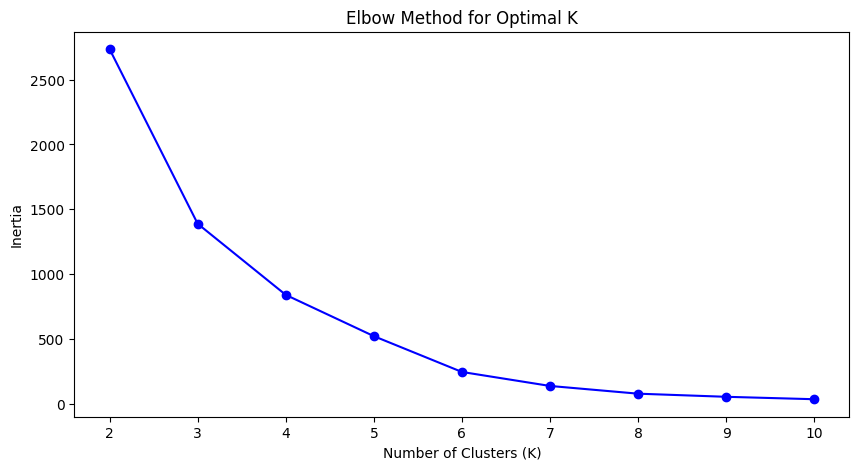

In [13]:
# K-means
# use the elbow method to see what is the best number of clusters K

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia_values = []
silhouette_scores = []

scaledDf = df.copy()

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,
                    init='k-means++',
                    n_init=10,
                    max_iter=300,
                    random_state=42)
    kmeans.fit(scaledDf[['Latitude', 'Longitude']])
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaledDf[['Latitude', 'Longitude']], kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [14]:
# k means grouping
kmeans = KMeans(n_clusters=4,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=42)
kmeans.fit(scaledDf[['Latitude', 'Longitude']])
scaledDf['Cluster'] = kmeans.labels_
scaledDf[['Latitude', 'Longitude', 'Cluster']].head()

,Latitude,Longitude,Cluster
22658,0.098685,0.057333,0
22659,0.098685,0.057333,0
22660,0.098685,0.057333,0
22661,0.098685,0.057333,0
22662,0.098685,0.057333,0


In [15]:
# uniques
scaledDf['Cluster'].value_counts()

,count
Cluster,
0,19575
1,12812
2,5724
3,4169


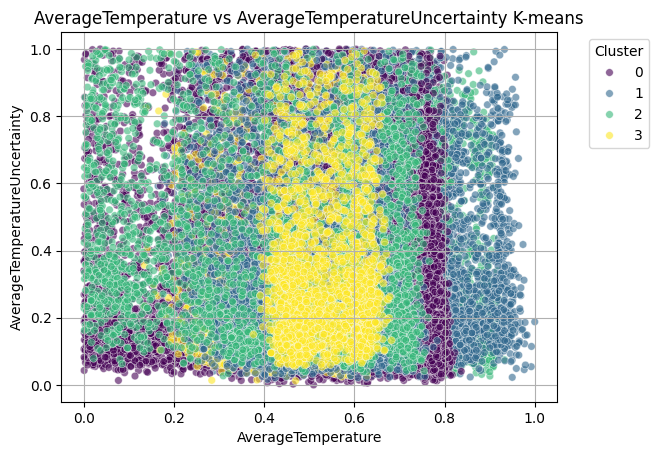

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the temps with Lat and Lng
sns.scatterplot(
    data=scaledDf,
    x='AverageTemperature',
    y='AverageTemperatureUncertainty',
    hue='Cluster',
    palette='viridis',
    s=30,
    alpha=0.6

)

plt.title('AverageTemperature vs AverageTemperatureUncertainty K-means')
plt.xlabel('AverageTemperature')
plt.ylabel('AverageTemperatureUncertainty')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

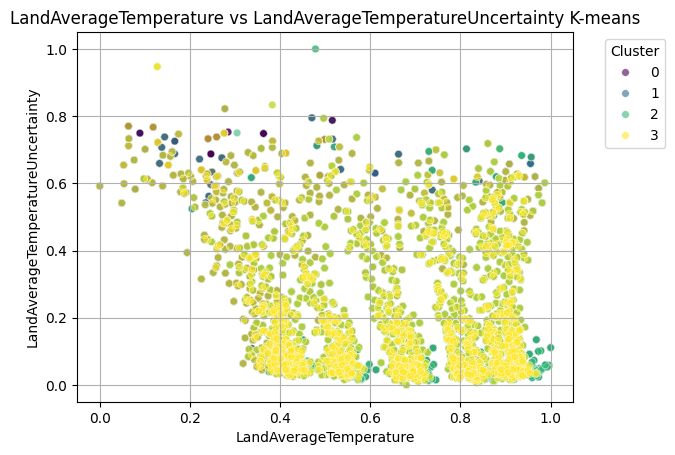

In [17]:
sns.scatterplot(
    data=scaledDf,
    x='LandAverageTemperature',
    y='LandAverageTemperatureUncertainty',
    hue='Cluster',
    palette='viridis',
    s=30,
    alpha=0.6

)

plt.title('LandAverageTemperature vs LandAverageTemperatureUncertainty K-means')
plt.xlabel('LandAverageTemperature')
plt.ylabel('LandAverageTemperatureUncertainty')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

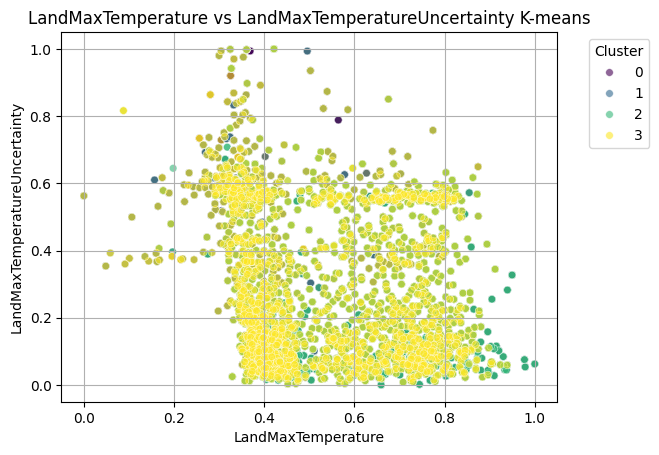

In [18]:
sns.scatterplot(
    data=scaledDf,
    x='LandMaxTemperature',
    y='LandMaxTemperatureUncertainty',
    hue='Cluster',
    palette='viridis',
    s=30,
    alpha=0.6

)

plt.title('LandMaxTemperature vs LandMaxTemperatureUncertainty K-means')
plt.xlabel('LandMaxTemperature')
plt.ylabel('LandMaxTemperatureUncertainty')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

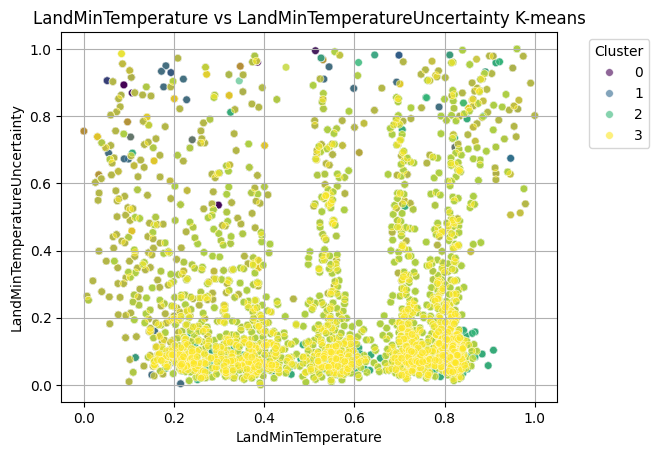

In [19]:
sns.scatterplot(
    data=scaledDf,
    x='LandMinTemperature',
    y='LandMinTemperatureUncertainty',
    hue='Cluster',
    palette='viridis',
    s=30,
    alpha=0.6

)

plt.title('LandMinTemperature vs LandMinTemperatureUncertainty K-means')
plt.xlabel('LandMinTemperature')
plt.ylabel('LandMinTemperatureUncertainty')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

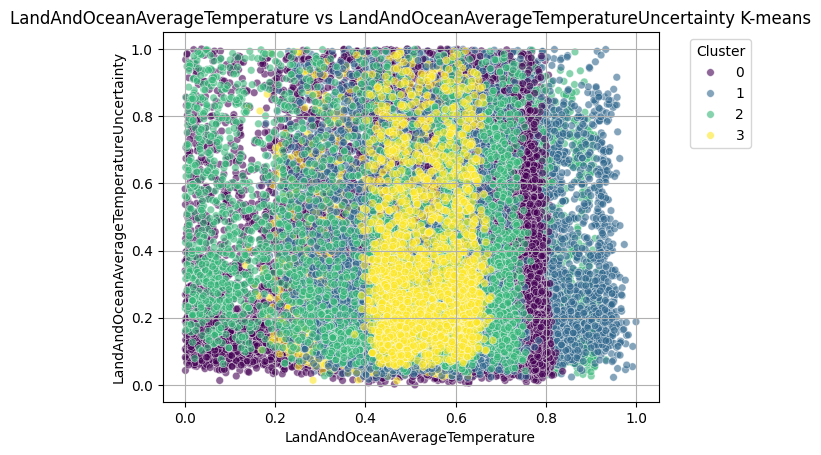

In [20]:
sns.scatterplot(
    data=scaledDf,
    x='LandAndOceanAverageTemperature',
    y='LandAndOceanAverageTemperatureUncertainty',
    hue='Cluster',
    palette='viridis',
    s=30,
    alpha=0.6

)

plt.title('LandAndOceanAverageTemperature vs LandAndOceanAverageTemperatureUncertainty K-means')
plt.xlabel('LandAndOceanAverageTemperature')
plt.ylabel('LandAndOceanAverageTemperatureUncertainty')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 11.Add a new feature that represent the rate of change between avgtemp and uncertainty based on country


In [21]:
# Add a new feature that represent the rate of change between avgtemp and uncertainty based on country
newDf = scaledDf.copy()
# Calculate the rate of change
newDf['TemperatureUncertaintyRate'] = (newDf['AverageTemperatureUncertainty'] / newDf['AverageTemperature'])

country_rates = newDf.groupby('Country')['TemperatureUncertaintyRate'].mean()
newDf.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,City,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,...,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,z_score,year,month,day,Cluster,TemperatureUncertaintyRate
22658,1849-01-01,0.782525,0.676851,Côte D'Ivoire,Abidjan,0.098685,0.057333,unknown,0.196992,0.630683,...,0.154010,0.705838,0.782525,0.676851,0.676851,1849,1,1,0,0.864957
22659,1849-02-01,0.796236,0.641124,Côte D'Ivoire,Abidjan,0.098685,0.057333,unknown,0.246183,0.596378,...,0.240486,0.729790,0.796236,0.641124,0.641124,1849,2,1,0,0.805194
22660,1849-03-01,0.808764,0.763476,Côte D'Ivoire,Abidjan,0.098685,0.057333,unknown,0.397273,0.622388,...,0.378934,0.979042,0.808764,0.763476,0.763476,1849,3,1,0,0.944004
22661,1849-04-01,0.771932,0.653359,Côte D'Ivoire,Abidjan,0.098685,0.057333,unknown,0.570049,0.568144,...,0.588094,0.814371,0.771932,0.653359,0.653359,1849,4,1,0,0.846395
22662,1849-05-01,0.758541,0.561840,Côte D'Ivoire,Abidjan,0.098685,0.057333,unknown,0.748889,0.372037,...,0.774780,0.313623,0.758541,0.561840,0.561840,1849,5,1,0,0.740685


In [22]:
# Land rate of change between avgtemp and uncertainty based on country

newDf['LandTemperatureUncertaintyRate'] = (newDf['LandAverageTemperatureUncertainty'] / newDf['LandAverageTemperature'])

country_rates = newDf.groupby('Country')['LandTemperatureUncertaintyRate'].mean()
newDf.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,City,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,...,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,z_score,year,month,day,Cluster,TemperatureUncertaintyRate,LandTemperatureUncertaintyRate
22658,1849-01-01,0.782525,0.676851,Côte D'Ivoire,Abidjan,0.098685,0.057333,unknown,0.196992,0.630683,...,0.705838,0.782525,0.676851,0.676851,1849,1,1,0,0.864957,3.201561
22659,1849-02-01,0.796236,0.641124,Côte D'Ivoire,Abidjan,0.098685,0.057333,unknown,0.246183,0.596378,...,0.729790,0.796236,0.641124,0.641124,1849,2,1,0,0.805194,2.422498
22660,1849-03-01,0.808764,0.763476,Côte D'Ivoire,Abidjan,0.098685,0.057333,unknown,0.397273,0.622388,...,0.979042,0.808764,0.763476,0.763476,1849,3,1,0,0.944004,1.566652
22661,1849-04-01,0.771932,0.653359,Côte D'Ivoire,Abidjan,0.098685,0.057333,unknown,0.570049,0.568144,...,0.814371,0.771932,0.653359,0.653359,1849,4,1,0,0.846395,0.996659
22662,1849-05-01,0.758541,0.561840,Côte D'Ivoire,Abidjan,0.098685,0.057333,unknown,0.748889,0.372037,...,0.313623,0.758541,0.561840,0.561840,1849,5,1,0,0.740685,0.496786


# 12.Compare between the temp in the different continental


In [35]:
# lets get the continental of the countries
unique_cities

,City,Country,Latitude,Longitude
22658,Abidjan,Côte D'Ivoire,5.63N,3.23W
24589,Addis Abeba,Ethiopia,8.84N,38.11E
26485,Ahmadabad,India,23.31N,72.52E
28664,Aleppo,Syria,36.17N,37.79E
30815,Alexandria,Egypt,31.35N,30.16E
32985,Ankara,Turkey,39.38N,33.29E
35126,Baghdad,Iraq,32.95N,45.00E
37196,Bangalore,India,12.05N,77.26E
37364,unknown,Brazil,0,0
39248,unknown,Russia,0,0


In [37]:
# unique countries
unique_countries = unique_cities['Country'].unique()
unique_countries

array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Brazil', 'Russia', 'United States', 'Canada', 'Denmark',
       'Kazakhstan', 'China', 'Spain'], dtype=object)

In [39]:
# find the continental of the countries


In [40]:
pip install pycountry pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 16.1 MB/s eta 0:00:00


In [41]:
import pycountry
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

def get_continent(country_name):
    try:
        country_alpha2 = country_name_to_country_alpha2(country_name)
        continent_code = country_alpha2_to_continent_code(country_alpha2)
        continent_name = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania",
            "AN": "Antarctica"
        }
        return continent_name.get(continent_code, "Unknown")
    except Exception as e:
        return "Unknown"

# List of countries
countries = unique_countries

# Get continents
continent_mapping = {country: get_continent(country) for country in countries}

for country, continent in continent_mapping.items():
    print(f"{country}: {continent}")


Côte D'Ivoire: Unknown
Ethiopia: Africa
India: Asia
Syria: Asia
Egypt: Africa
Turkey: Asia
Iraq: Asia
Brazil: South America
Russia: Europe
United States: North America
Canada: North America
Denmark: Europe
Kazakhstan: Asia
China: Asia
Spain: Europe


In [43]:
data_with_continents_df = newDf.copy()
data_with_continents_df['Continent'] = data_with_continents_df['Country'].map(continent_mapping)
data_with_continents_df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,City,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,...,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,z_score,year,month,day,Cluster,TemperatureUncertaintyRate,LandTemperatureUncertaintyRate,Continent
64935,1998-11-01,0.501437,0.079284,Spain,A Coruña,0.746538,0.000000,unknown,0.559021,0.035958,...,0.501437,0.079284,0.079284,1998,11,1,3,0.158114,0.064324,Europe
64936,1998-12-01,0.448604,0.118926,Spain,A Coruña,0.746538,0.000000,unknown,0.453885,0.043484,...,0.448604,0.118926,0.118926,1998,12,1,3,0.265103,0.095804,Europe
64937,1999-01-01,0.458295,0.097392,Spain,A Coruña,0.746538,0.000000,unknown,0.412447,0.044903,...,0.458295,0.097392,0.097392,1999,1,1,3,0.212510,0.108868,Europe
64938,1999-02-01,0.450407,0.117458,Spain,A Coruña,0.746538,0.000000,unknown,0.466892,0.068395,...,0.450407,0.117458,0.117458,1999,2,1,3,0.260782,0.146490,Europe
64939,1999-03-01,0.493755,0.089562,Spain,A Coruña,0.736196,0.091004,unknown,0.529866,0.037407,...,0.493755,0.089562,0.089562,1999,3,1,3,0.181389,0.070597,Europe


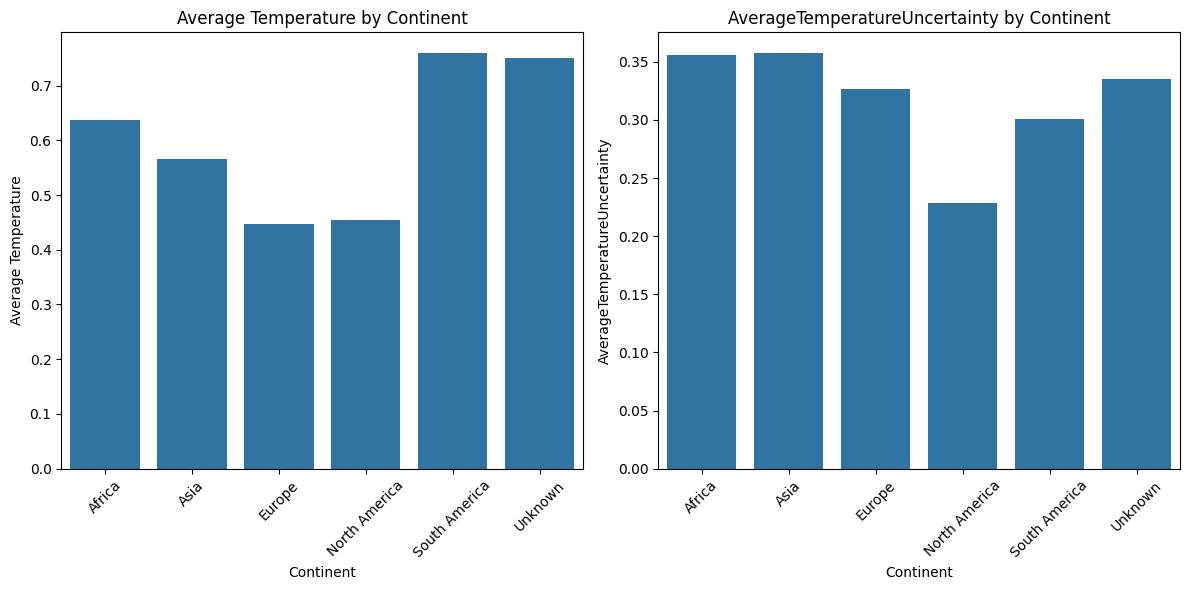

In [45]:
# okay now we have the continent of each country
# 12.Compare between the temp in the different continental
# Group data by continent and calculate average temps

continental_temps = data_with_continents_df.groupby('Continent')[['AverageTemperature', 'AverageTemperatureUncertainty']].mean()

# Create bar plots for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=continental_temps.index, y=continental_temps['AverageTemperature'])
plt.title('Average Temperature by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=continental_temps.index, y=continental_temps['AverageTemperatureUncertainty'])
plt.title('AverageTemperatureUncertainty by Continent')
plt.xlabel('Continent')
plt.ylabel('AverageTemperatureUncertainty')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

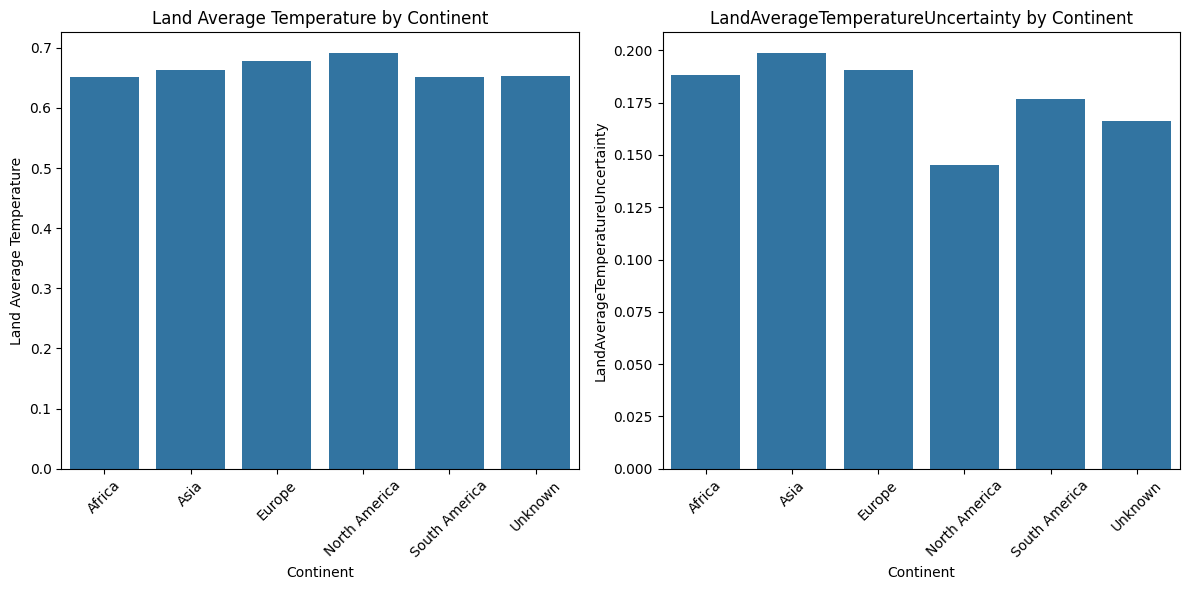

In [46]:
# comp between land
continental_temps = data_with_continents_df.groupby('Continent')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']].mean()

# Create bar plots for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=continental_temps.index, y=continental_temps['LandAverageTemperature'])
plt.title('Land Average Temperature by Continent')
plt.xlabel('Continent')
plt.ylabel('Land Average Temperature')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=continental_temps.index, y=continental_temps['LandAverageTemperatureUncertainty'])
plt.title('LandAverageTemperatureUncertainty by Continent')
plt.xlabel('Continent')
plt.ylabel('LandAverageTemperatureUncertainty')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

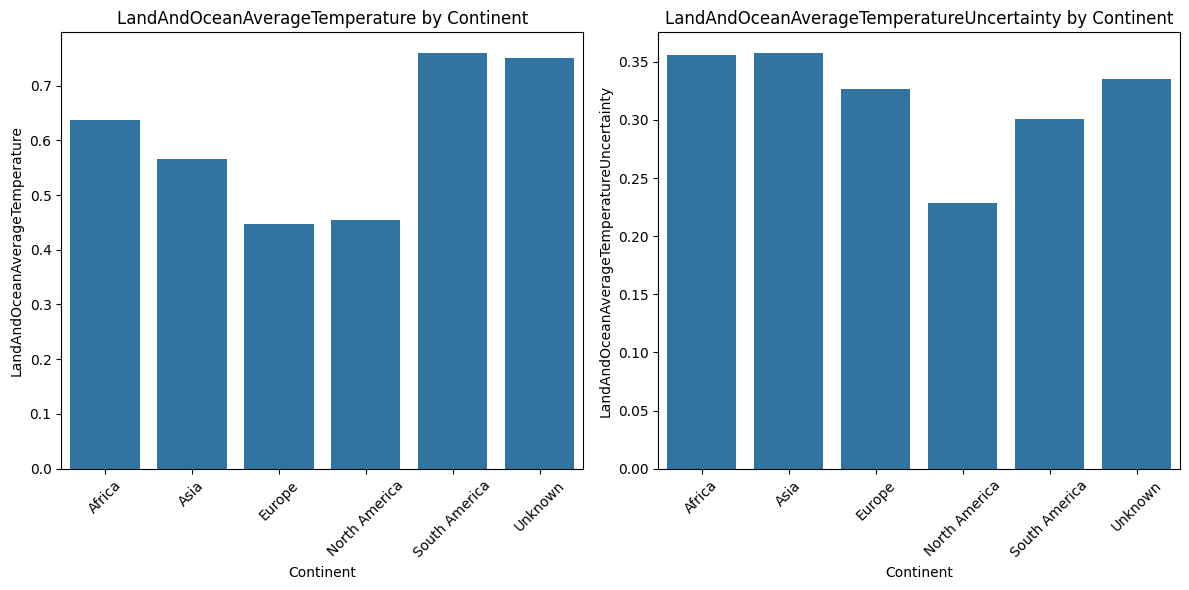

In [47]:
# Land and ocean
continental_temps = data_with_continents_df.groupby('Continent')[['LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']].mean()

# Create bar plots for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=continental_temps.index, y=continental_temps['LandAndOceanAverageTemperature'])
plt.title('LandAndOceanAverageTemperature by Continent')
plt.xlabel('Continent')
plt.ylabel('LandAndOceanAverageTemperature')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=continental_temps.index, y=continental_temps['LandAndOceanAverageTemperatureUncertainty'])
plt.title('LandAndOceanAverageTemperatureUncertainty by Continent')
plt.xlabel('Continent')
plt.ylabel('LandAndOceanAverageTemperatureUncertainty')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 13.Compare the temp in each continental

In [48]:
# compare temps in each conteinental

# a loop on the conteinents and in each show min and max and avg and land and ocean and land

for continent in continent_mapping.values():
    continent_data = data_with_continents_df[data_with_continents_df['Continent'] == continent]

    print(f"\nContinent: {continent}")
    print(f"Minimum Temperature: {continent_data['AverageTemperature'].min()}")
    print(f"Maximum Temperature: {continent_data['AverageTemperature'].max()}")
    print(f"Average Temperature: {continent_data['AverageTemperature'].mean()}")
    print(f"Land Minimum Temperature: {continent_data['LandAverageTemperature'].min()}")
    print(f"Land Maximum Temperature: {continent_data['LandAverageTemperature'].max()}")
    print(f"Land Average Temperature: {continent_data['LandAverageTemperature'].mean()}")
    print(f"LandAndOcean Minimum Temperature: {continent_data['LandAndOceanAverageTemperature'].min()}")
    print(f"LandAndOcean Maximum Temperature: {continent_data['LandAndOceanAverageTemperature'].max()}")
    print(f"LandAndOcean Average Temperature: {continent_data['LandAndOceanAverageTemperature'].mean()}")
    print("-" * 50)



Continent: Unknown
Minimum Temperature: 0.2955811962066305
Maximum Temperature: 0.8429840542418721
Average Temperature: 0.7498517783979015
Land Minimum Temperature: 0.1394419102027713
Land Maximum Temperature: 1.0
Land Average Temperature: 0.6536285110812083
LandAndOcean Minimum Temperature: 0.2955811962066305
LandAndOcean Maximum Temperature: 0.8429840542418721
LandAndOcean Average Temperature: 0.7498517783979015
--------------------------------------------------

Continent: Africa
Minimum Temperature: 0.2955811962066305
Maximum Temperature: 0.8220047705801702
Average Temperature: 0.6362081921053174
Land Minimum Temperature: 0.0
Land Maximum Temperature: 1.0
Land Average Temperature: 0.6520877431260452
LandAndOcean Minimum Temperature: 0.2955811962066305
LandAndOcean Maximum Temperature: 0.8220047705801702
LandAndOcean Average Temperature: 0.6362081921053174
--------------------------------------------------

Continent: Asia
Minimum Temperature: 0.000507108915726
Maximum Temperature:

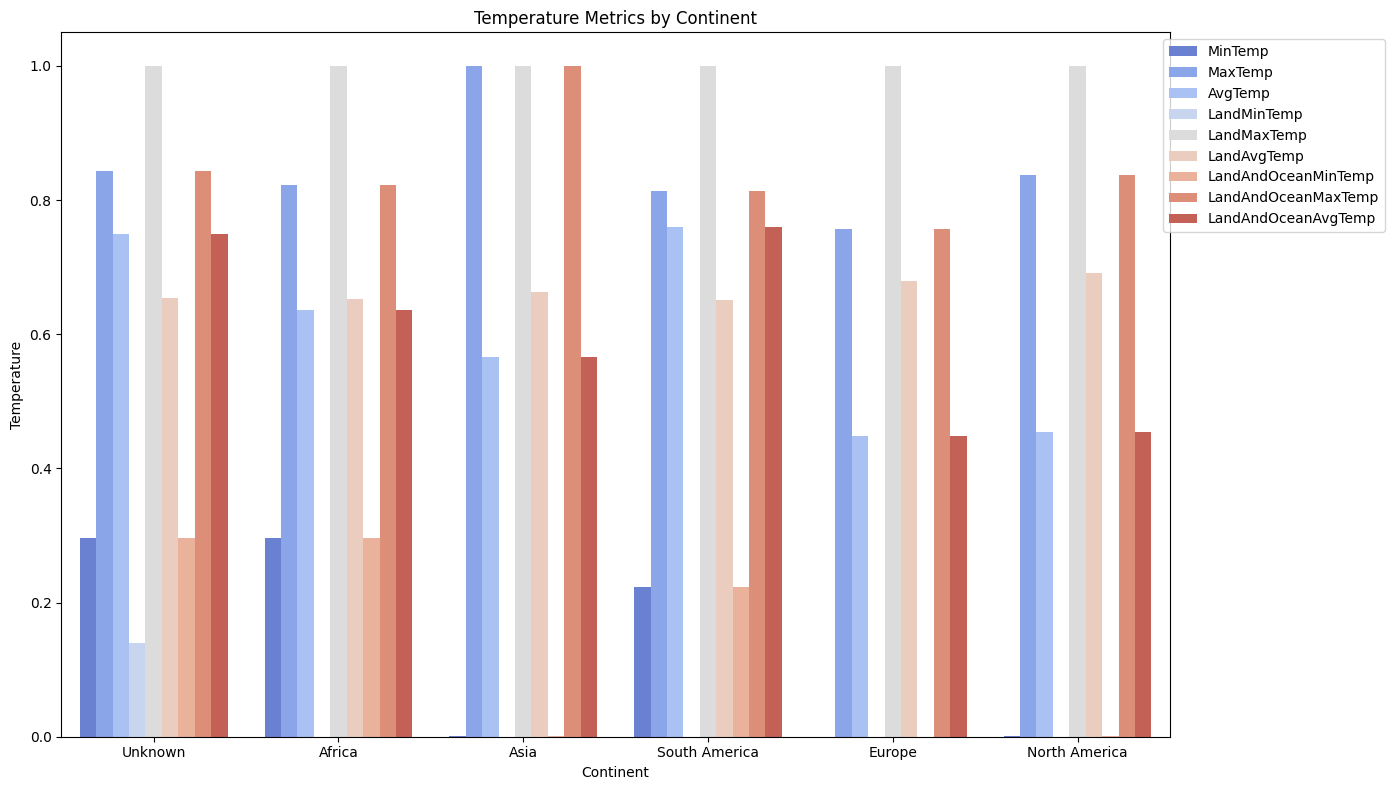

In [50]:
# visual plot of each contenint and it's temps

continents = data_with_continents_df['Continent'].unique()

temperature_summary = []

for continent in continents:
    continent_data = data_with_continents_df[data_with_continents_df['Continent'] == continent]
    summary = {
        "Continent": continent,
        "MinTemp": continent_data['AverageTemperature'].min(),
        "MaxTemp": continent_data['AverageTemperature'].max(),
        "AvgTemp": continent_data['AverageTemperature'].mean(),
        "LandMinTemp": continent_data['LandAverageTemperature'].min(),
        "LandMaxTemp": continent_data['LandAverageTemperature'].max(),
        "LandAvgTemp": continent_data['LandAverageTemperature'].mean(),
        "LandAndOceanMinTemp": continent_data['LandAndOceanAverageTemperature'].min(),
        "LandAndOceanMaxTemp": continent_data['LandAndOceanAverageTemperature'].max(),
        "LandAndOceanAvgTemp": continent_data['LandAndOceanAverageTemperature'].mean(),
    }
    temperature_summary.append(summary)

summary_df = pd.DataFrame(temperature_summary)

melted_df = summary_df.melt(id_vars="Continent", var_name="Metric", value_name="Temperature")

# bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x="Continent", y="Temperature", hue="Metric", data=melted_df, palette="coolwarm")
plt.title("Temperature Metrics by Continent")
plt.xlabel("Continent")
plt.ylabel("Temperature")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


# 14.Group the areas (cities) around the world that have similar temps behave


In [25]:
similarTemps = newDf.copy()

In [26]:
# First lets find the similarity between the temps

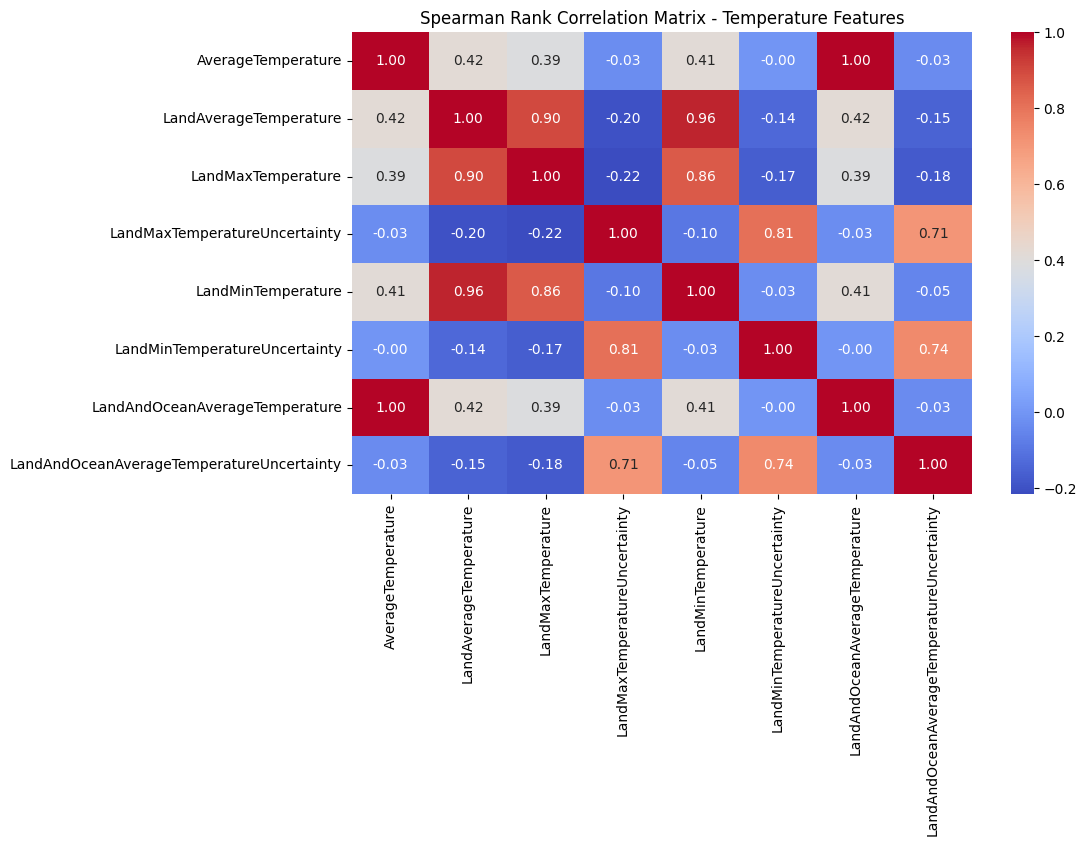

In [27]:
temp_features = ['AverageTemperature', 'LandAverageTemperature', 'LandMaxTemperature',
                 'LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty',
                 'LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty']


spearman_matrix = df[temp_features].corr(method='spearman')

# Display the Spearman correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Spearman Rank Correlation Matrix - Temperature Features")
plt.show()

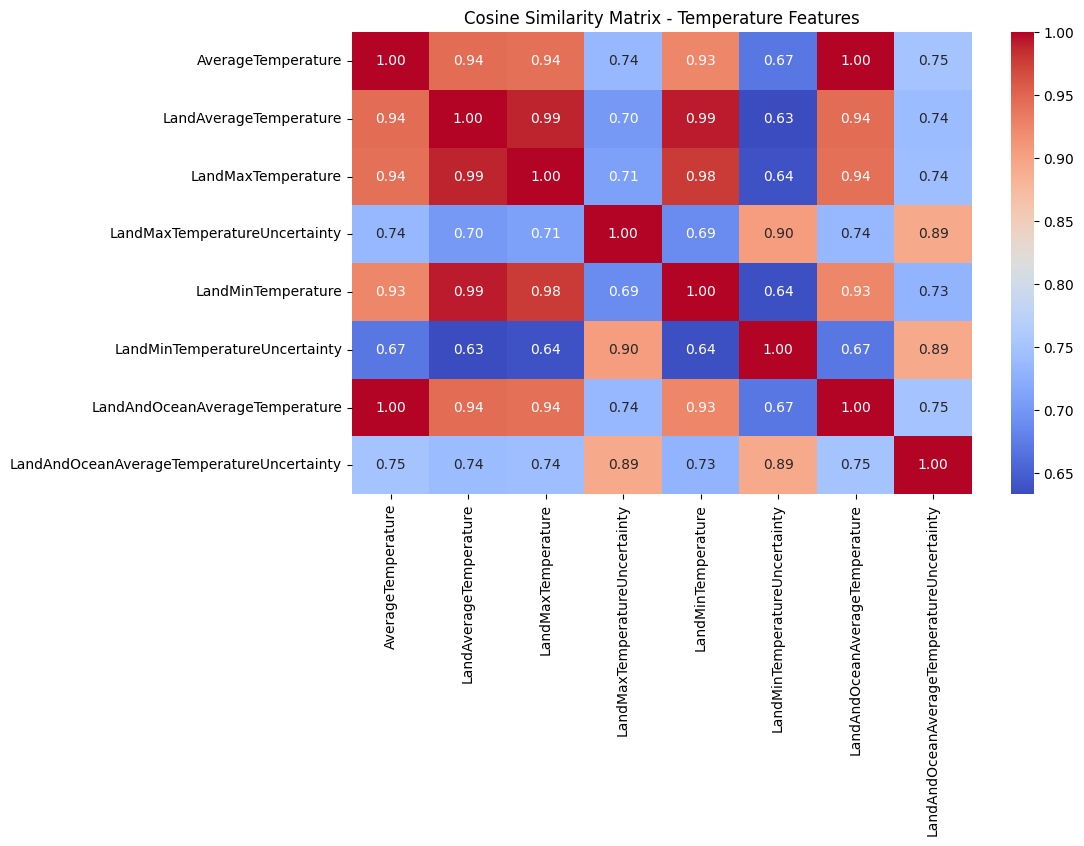

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

data = df[temp_features].values

cosine_sim = cosine_similarity(data.T)

# Save to DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, columns=temp_features, index=temp_features)

# Display the cosine similarity matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cosine_sim, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=temp_features, yticklabels=temp_features)
plt.title("Cosine Similarity Matrix - Temperature Features")
plt.show()

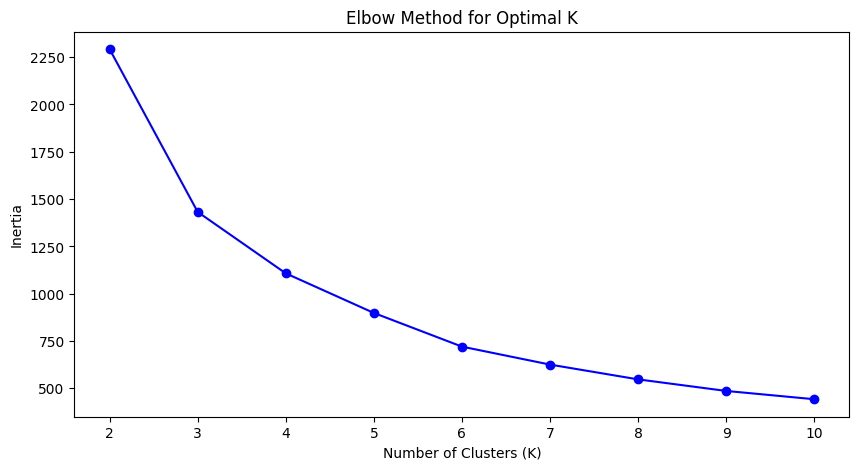

In [29]:
# find the elbow method for the similar temps, group by similarity in temp avg and temp uncertainty

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia_values = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,
                    init='k-means++',
                    n_init=10,
                    max_iter=300,
                    random_state=42)
    kmeans.fit(similarTemps[['AverageTemperature', 'AverageTemperatureUncertainty']])
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(similarTemps[['AverageTemperature', 'AverageTemperatureUncertainty']], kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

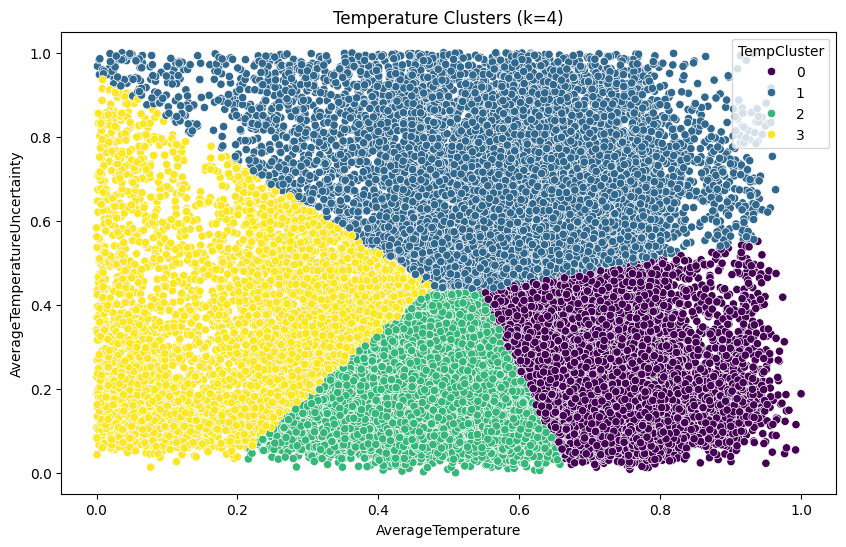

In [30]:
kmeans = KMeans(n_clusters=4)
similarTemps['TempCluster'] = kmeans.fit_predict(similarTemps[['AverageTemperature','AverageTemperatureUncertainty']])

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AverageTemperature', y='AverageTemperatureUncertainty', hue='TempCluster', data=similarTemps, palette='viridis')
plt.title(f'Temperature Clusters (k={4})')
plt.show()

In [31]:

for cluster_num in range(4):
    print(f"\nCluster {cluster_num}:")
    cluster_data = similarTemps[similarTemps['TempCluster'] == cluster_num]
    print("Cities in this cluster:")
    print(cluster_data['City'].unique())


Cluster 0:
Cities in this cluster:
['Abidjan' 'Addis Abeba' 'Ahmadabad' 'Aleppo' 'Alexandria' 'Ankara'
 'Baghdad' 'Bangalore' 'unknown' 'Århus' 'Çorlu' 'Çorum' 'Öskemen'
 'Ürümqi' 'A Coruña']

Cluster 1:
Cities in this cluster:
['Abidjan' 'Addis Abeba' 'Ahmadabad' 'Aleppo' 'Alexandria' 'Ankara'
 'Baghdad' 'Bangalore' 'unknown' 'Århus' 'Çorlu' 'Çorum' 'Öskemen'
 'Ürümqi' 'A Coruña']

Cluster 2:
Cities in this cluster:
['Addis Abeba' 'Ahmadabad' 'Aleppo' 'Alexandria' 'Ankara' 'Baghdad'
 'unknown' 'Århus' 'Çorlu' 'Çorum' 'Öskemen' 'Ürümqi' 'A Coruña']

Cluster 3:
Cities in this cluster:
['Abidjan' 'Aleppo' 'Ankara' 'Baghdad' 'unknown' 'Århus' 'Çorlu' 'Çorum'
 'Öskemen' 'Ürümqi' 'A Coruña']


# 15.Group the areas (cities) that have same temp behave within date season

In [32]:
# similarTemps
# divide the year to 1/4
# so the clustering again but this time also consider date time

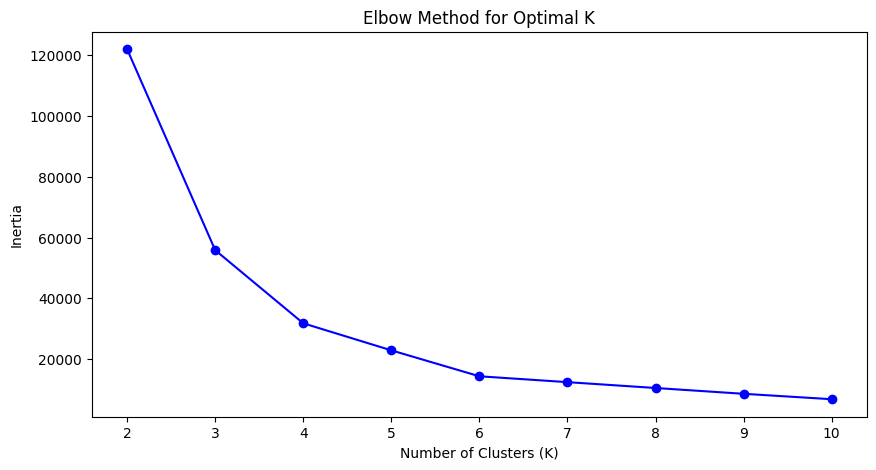

In [33]:
# find the elbow method for the similar temps, group by similarity in temp avg and temp uncertainty

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia_values = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,
                    init='k-means++',
                    n_init=10,
                    max_iter=300,
                    random_state=42)
    kmeans.fit(similarTemps[['AverageTemperature', 'AverageTemperatureUncertainty', 'month']])
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(similarTemps[['AverageTemperature', 'AverageTemperatureUncertainty', 'month']], kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

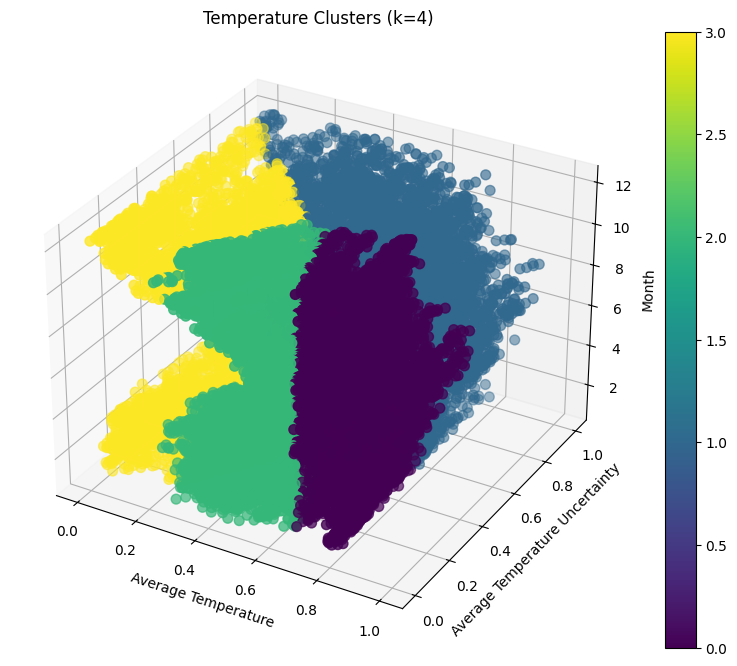

In [34]:
# 3D clustering, since we got 3 features here

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D with color coding by cluster
scatter = ax.scatter(similarTemps['AverageTemperature'],
                     similarTemps['AverageTemperatureUncertainty'],
                     similarTemps['month'],
                     c=similarTemps['TempCluster'],
                     cmap='viridis', s=50)

ax.set_xlabel('Average Temperature')
ax.set_ylabel('Average Temperature Uncertainty')
ax.set_zlabel('Month')
ax.set_title(f'Temperature Clusters (k={4})')

plt.colorbar(scatter)

plt.show()